In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
cd /content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN

/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN


In [86]:
!git config --global user.email '7373wj@naver.com'
!git config --global user.name 'woonjun'

In [87]:
!git add --all

In [88]:
!git commit -m 'Cifar100 학습 완료'
!git push

[main 597f42f] Cifar100 학습 완료
 42 files changed, 1 insertion(+)
 create mode 100644 ML_CNN/CNN_CIFAR100.ipynb
 create mode 100644 ML_CNN/cifar100.h5
 create mode 100644 ML_CNN/dataset/cifar100/1.jpg
 create mode 100644 ML_CNN/dataset/cifar100/10.jpg
 create mode 100644 ML_CNN/dataset/cifar100/11.jpg
 create mode 100644 ML_CNN/dataset/cifar100/12.jpg
 create mode 100644 ML_CNN/dataset/cifar100/13.jpg
 create mode 100644 ML_CNN/dataset/cifar100/14.jpg
 create mode 100644 ML_CNN/dataset/cifar100/15.jpg
 create mode 100644 ML_CNN/dataset/cifar100/16.jpg
 create mode 100644 ML_CNN/dataset/cifar100/17.jpg
 create mode 100644 ML_CNN/dataset/cifar100/18.jpg
 create mode 100644 ML_CNN/dataset/cifar100/19.jpg
 create mode 100644 ML_CNN/dataset/cifar100/2.jpg
 create mode 100644 ML_CNN/dataset/cifar100/20.jpg
 create mode 100644 ML_CNN/dataset/cifar100/21.jpg
 create mode 100644 ML_CNN/dataset/cifar100/22.jpg
 create mode 100644 ML_CNN/dataset/cifar100/23.jpg
 create mode 100644 ML_CNN/dataset/ci

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [4]:
# CIFAR-100 클래스
CIFAR100_CLASSES = sorted(['beaver', 'dolphin', 'otter', 'seal', 'whale',  # aquatic mammals
                           'aquarium' 'fish', 'flatfish', 'ray', 'shark', 'trout',  # fish
                           'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', # flowers
                           'bottles', 'bowls', 'cans', 'cups', 'plates', # food containers
                           'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', # fruit and vegetables
                           'clock', 'computer' 'keyboard', 'lamp', 'telephone', 'television', # household electrical devices
                           'bed', 'chair', 'couch', 'table', 'wardrobe', # household furniture
                           'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', # insects
                           'bear', 'leopard', 'lion', 'tiger', 'wolf', # large carnivores
                           'bridge', 'castle', 'house', 'road', 'skyscraper', # large man-made outdoor things
                           'cloud', 'forest', 'mountain', 'plain', 'sea', # large natural outdoor scenes
                           'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', # large omnivores and herbivores
                           'fox', 'porcupine', 'possum', 'raccoon', 'skunk', # medium-sized mammals
                           'crab', 'lobster', 'snail', 'spider', 'worm', # non-insect invertebrates
                           'baby', 'boy', 'girl', 'man', 'woman', # people
                           'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', # reptiles
                           'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', # small mammals
                           'maple', 'oak', 'palm', 'pine', 'willow', # trees
                           'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', # vehicles 1
                           'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor' # vehicles 2
                          ])

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()


# Normalizing data
x_train, x_test = x_train / 255.0, x_test / 255.0

with tf.device('/device:GPU:0'):
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, input_shape=(32,32,3), kernel_initializer='he_uniform', activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, kernel_initializer='he_uniform', activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.25),

      tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, kernel_initializer='he_uniform', activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, kernel_initializer='he_uniform', activation='relu'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      tf.keras.layers.Dropout(0.25),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=512, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(units=100, activation='softmax'),
  ])

initial_lr = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

result = model.evaluate(x_test, y_test)
print("최종 예측 성공률(%): ", result[1]*100)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [64]:
model.save("cifar100.h5")

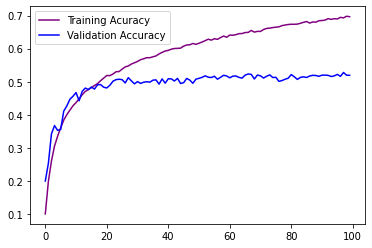

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'purple',label = 'Training Acuracy')
plt.plot(val_acc,color = 'blue',label = 'Validation Accuracy')
plt.legend()


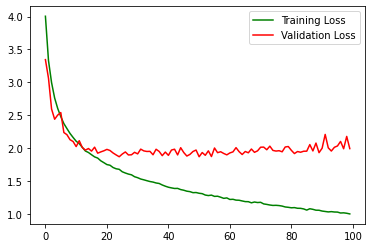

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [16]:
img_path_list = []
for i in range(1,41):
  root_dir = '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/'
  root_dir += str(i)
  root_dir += '.jpg'
  img_path_list.append(root_dir)


print(img_path_list)

['/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/1.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/2.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/3.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/4.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/5.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/6.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/7.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/8.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/9.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/10.jpg', '/content/drive/MyDrive/Colab Notebooks/GITHUB/colab_ML/ML_CNN/dataset/cifar100/11.jpg', '/content/drive/MyDrive/Colab

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

count = 0
false_number=[]
for i in range(len(img_path_list)):
  img = cv2.imread(img_path_list[i])
  img = cv2.resize(img,(32,32),interpolation=cv2.INTER_NEAREST)
  imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)/255
  imgRGB = imgRGB.reshape(-1,32,32,3)

  print(CIFAR100_CLASSES[(np.argmax((model.predict(imgRGB)>0.5).astype("int32")))])

1/1 [==============================] - 0s 26ms/step
couch
1/1 [==============================] - 0s 24ms/step
couch
1/1 [==============================] - 0s 25ms/step
sunflowers
1/1 [==============================] - 0s 30ms/step
apples
1/1 [==============================] - 0s 28ms/step
kangaroo
1/1 [==============================] - 0s 23ms/step
butterfly
1/1 [==============================] - 0s 22ms/step
apples
1/1 [==============================] - 0s 24ms/step
apples
1/1 [==============================] - 0s 28ms/step
apples
1/1 [==============================] - 0s 33ms/step
apples
1/1 [==============================] - 0s 32ms/step
sunflowers
1/1 [==============================] - 0s 36ms/step
sunflowers
1/1 [==============================] - 0s 46ms/step
apples
1/1 [==============================] - 0s 30ms/step
apples
1/1 [==============================] - 0s 32ms/step
kangaroo
1/1 [==============================] - 0s 31ms/step
sea
1/1 [==============================] - 0s 

In [47]:
def draw_img(x) : 
  plt.figure()
  plt.imshow(x)
  plt.show()

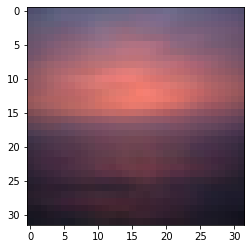

sea


In [61]:
idx = 4
draw_img(x_test[idx])
print(CIFAR100_CLASSES[y_test[idx][0]])